## Final Project

<B>Student:</B> John Zhune

<B>Course Name:</B> ALY2100 - Introduction to Programming for Data Analytics

<B>Term:</B> Summer 2024

<B>Instructor:</B> Vladimir Shapiro

<div style=\"page-break-after: always;\"></div>

## Introduction
For our final project, we will analyze two datasets. One dataset contains information about cars and the other contains information pertinent to covid testing. The cars dataset contains information necessary for business like mileage and price. We will use these two attributes amongst others to analyze the data. We will use the cars data to analyze the linear regression model and extract a prediction from the model.<BR></BR>
<B><U>Framing the Problem:</U></B><BR>The covid testing dataset contains data that is important for scientific advancement and social responsibility. We will be using the covid testing data for classification analysis purposes. For example, we will create a decision tree classifier and a logistic regression model (with a performance evaluation).

## Analysis

<B><U>Data Processing</U></B>

In [24]:
# We will start by importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #pip install heatmapz
from heatmap import corrplot
import ydata_profiling 
from ydata_profiling import ProfileReport
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from sklearn import datasets
import statsmodels.api as sm
from matplotlib.colors import ListedColormap
%matplotlib inline

# Setup seaborn options for visualization
sns.set()
sns.set_style('whitegrid')

In [25]:
from rdatasets import data
# Start with first dataset, we will use this one for the linear regression model
cars_df = data("modeldata", "car_prices") # load cars data into the Pandas dataframe
display(cars_df.head()) # display first 5 rows of cars_df
type(cars_df) # display type of data for cars_df

rownames     Price  Mileage  Cylinder  Doors  Cruise  Sound  Leather  \
0         1  22661.05    20105         6      4       1      0        0   
1         2  21725.01    13457         6      2       1      1        0   
2         3  29142.71    31655         4      2       1      1        1   
3         4  30731.94    22479         4      2       1      0        0   
4         5  33358.77    17590         4      2       1      1        1   

   Buick  Cadillac  Chevy  Pontiac  Saab  Saturn  convertible  coupe  \
0      1         0      0        0     0       0            0      0   
1      0         0      1        0     0       0            0      1   
2      0         0      0        0     1       0            1      0   
3      0         0      0        0     1       0            1      0   
4      0         0      0        0     1       0            1      0   

   hatchback  sedan  wagon  
0          0      1      0  
1          0      0      0  
2          0      0      0  
3          0      0      0  
4          0      0      0

pandas.core.frame.DataFrame

In [26]:
# Then this next dataset will be used for the logistic regression model and performance evaluation
# We will also use it for the Decision Tree Classifier (Classification), and K-means Clustering (Statistics)
covidt_df = data("medicaldata", "covid_testing") # load covid-test data into the Pandas dataframe
display(covidt_df.head()) # display the first five rows for covidt_df
type(covidt_df) # display type of data for covidt_df

rownames  subject_id fake_first_name fake_last_name  gender  pan_day  \
0         1        1412         jhezane     westerling  female        4   
1         2         533           penny      targaryen  female        7   
2         3        9134           grunt         rivers    male        7   
3         4        8518      melisandre          swyft  female        8   
4         5        8967          rolley       karstark    male        8   

  test_id       clinic_name    result demo_group  age  drive_thru_ind  \
0   covid  inpatient ward a  negative    patient  0.0               0   
1   covid      clinical lab  negative    patient  0.0               1   
2   covid      clinical lab  negative    patient  0.8               1   
3   covid      clinical lab  negative    patient  0.8               1   
4   covid    emergency dept  negative    patient  0.8               0   

   ct_result  orderset payor_group   patient_class  col_rec_tat  rec_ver_tat  
0       45.0         0  government       inpatient          1.4          5.2  
1       45.0         0  commercial  not applicable          2.3          5.8  
2       45.0         1         NaN             NaN          7.3          4.7  
3       45.0         1         NaN             NaN          5.8          5.0  
4       45.0         1  government       emergency          1.2          6.4

pandas.core.frame.DataFrame

In [27]:
print("The columns for these dataframes are self-explanatory. We will proceed to get the descriptive statistics for both.")

The columns for these dataframes are self-explanatory. We will proceed to get the descriptive statistics for both.


## Descriptive Statistics for cars_df

In [29]:
cars_df.describe() # use .describe() to obtain descriptive statistics for cars_df

rownames         Price       Mileage    Cylinder       Doors  \
count  804.000000    804.000000    804.000000  804.000000  804.000000   
mean   402.500000  21343.143756  19831.934080    5.268657    3.527363   
std    232.239101   9884.852799   8196.319707    1.387531    0.850169   
min      1.000000   8638.930000    266.000000    4.000000    2.000000   
25%    201.750000  14273.075000  14623.500000    4.000000    4.000000   
50%    402.500000  18024.995000  20913.500000    6.000000    4.000000   
75%    603.250000  26717.317500  25213.000000    6.000000    4.000000   
max    804.000000  70755.470000  50387.000000    8.000000    4.000000   

           Cruise       Sound     Leather       Buick    Cadillac       Chevy  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     0.752488    0.679104    0.723881    0.099502    0.099502    0.398010   
std      0.431836    0.467111    0.447355    0.299522    0.299522    0.489792   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    0.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          Pontiac        Saab      Saturn  convertible       coupe  \
count  804.000000  804.000000  804.000000   804.000000  804.000000   
mean     0.186567    0.141791    0.074627     0.062189    0.174129   
std      0.389806    0.349053    0.262952     0.241649    0.379457   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.000000    0.000000    0.000000     0.000000    0.000000   
50%      0.000000    0.000000    0.000000     0.000000    0.000000   
75%      0.000000    0.000000    0.000000     0.000000    0.000000   
max      1.000000    1.000000    1.000000     1.000000    1.000000   

        hatchback       sedan       wagon  
count  804.000000  804.000000  804.000000  
mean     0.074627    0.609453    0.079602  
std      0.262952    0.488177    0.270845  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    1.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000

In [30]:
cars_df.info() #clean up with print(f" ", cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     804 non-null    int64  
 1   Price        804 non-null    float64
 2   Mileage      804 non-null    int64  
 3   Cylinder     804 non-null    int64  
 4   Doors        804 non-null    int64  
 5   Cruise       804 non-null    int64  
 6   Sound        804 non-null    int64  
 7   Leather      804 non-null    int64  
 8   Buick        804 non-null    int64  
 9   Cadillac     804 non-null    int64  
 10  Chevy        804 non-null    int64  
 11  Pontiac      804 non-null    int64  
 12  Saab         804 non-null    int64  
 13  Saturn       804 non-null    int64  
 14  convertible  804 non-null    int64  
 15  coupe        804 non-null    int64  
 16  hatchback    804 non-null    int64  
 17  sedan        804 non-null    int64  
 18  wagon        804 non-null    int64  
dtypes: float

In [31]:
cars_df.mean() #clean up with print(f" ", cars_df.mean())

rownames         402.500000
Price          21343.143756
Mileage        19831.934080
Cylinder           5.268657
Doors              3.527363
Cruise             0.752488
Sound              0.679104
Leather            0.723881
Buick              0.099502
Cadillac           0.099502
Chevy              0.398010
Pontiac            0.186567
Saab               0.141791
Saturn             0.074627
convertible        0.062189
coupe              0.174129
hatchback          0.074627
sedan              0.609453
wagon              0.079602
dtype: float64

## Descriptive Statistics for covidt_df

In [33]:
covidt_df.describe() # use .describe() to obtain descriptive statistics for covidt_df

rownames    subject_id       pan_day           age  drive_thru_ind  \
count  15524.000000  15524.000000  15524.000000  15524.000000    15524.000000   
mean    7762.500000   5570.654406     63.208580     14.189474        0.514494   
std     4481.537125   3613.695453     27.219249     16.472406        0.499806   
min        1.000000      1.000000      4.000000      0.000000        0.000000   
25%     3881.750000   2329.750000     38.000000      2.000000        0.000000   
50%     7762.500000   5268.000000     65.000000      9.000000        1.000000   
75%    11643.250000   8636.250000     87.000000     18.000000        1.000000   
max    15524.000000  12346.000000    107.000000    138.000000        1.000000   

          ct_result      orderset   col_rec_tat   rec_ver_tat  
count  15315.000000  15524.000000  15524.000000  15524.000000  
mean      44.121546      0.695182      7.221470      5.638688  
std        3.981072      0.460345    492.816252      5.092815  
min       14.050000      0.000000      0.000000    -18.600000  
25%       45.000000      0.000000      0.700000      4.000000  
50%       45.000000      1.000000      1.900000      5.000000  
75%       45.000000      1.000000      3.600000      6.200000  
max       45.000000      1.000000  61370.200000    218.200000

In [34]:
covidt_df.info() #clean up with print(f" ", covidt_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15524 entries, 0 to 15523
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         15524 non-null  int64  
 1   subject_id       15524 non-null  int64  
 2   fake_first_name  15461 non-null  object 
 3   fake_last_name   15524 non-null  object 
 4   gender           15524 non-null  object 
 5   pan_day          15524 non-null  int64  
 6   test_id          15524 non-null  object 
 7   clinic_name      15524 non-null  object 
 8   result           15524 non-null  object 
 9   demo_group       15524 non-null  object 
 10  age              15524 non-null  float64
 11  drive_thru_ind   15524 non-null  int64  
 12  ct_result        15315 non-null  float64
 13  orderset         15524 non-null  int64  
 14  payor_group      8437 non-null   object 
 15  patient_class    8447 non-null   object 
 16  col_rec_tat      15524 non-null  float64
 17  rec_ver_tat 

In [35]:
print("Mean:\n")
covidt_df.mean(numeric_only=True)

Mean:



rownames          7762.500000
subject_id        5570.654406
pan_day             63.208580
age                 14.189474
drive_thru_ind       0.514494
ct_result           44.121546
orderset             0.695182
col_rec_tat          7.221470
rec_ver_tat          5.638688
dtype: float64

## Use *ydata-profiling* for further exploration of covid testing data

In [37]:
covidt_profile = ProfileReport(covidt_df, title="Covid TestingProfiling Report")

# Choose either of the two options below:
# profile.to_widgets() # This is achieved by simply displaying the report as a set of widgets.
covidt_profile.to_notebook_iframe() # The HTML report can be directly embedded in a cell

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
cars_profile = ProfileReport(cars_df, title="Cars Profiling Report")

# Choose either of the two options below:
# profile.to_widgets() # This is achieved by simply displaying the report as a set of widgets.
cars_profile.to_notebook_iframe() # The HTML report can be directly embedded in a cell

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## We will be analysing the stats for age and time elapsed between receive time and verification time. 

In [40]:
ageMean = covidt_df.age.mean()
ageMode = covidt_df.age.mode().values
ageMedian = covidt_df.age.median()
ageStd = covidt_df.age.std()
ageVar = covidt_df.age.var()

print(f'mean: {ageMean:.2f} | median: {ageMedian:.2f} | mode: {ageMode:} '
      f'Std: {ageStd:.2f} | Variance: {ageVar:.2f}')

mean: 14.19 | median: 9.00 | mode: [2.] Std: 16.47 | Variance: 271.34


In [41]:
rec_ver_tatMean = covidt_df.rec_ver_tat.mean()
rec_ver_tatMode = covidt_df.rec_ver_tat.mode().values
rec_ver_tatMedian = covidt_df.rec_ver_tat.median()
rec_ver_tatStd = covidt_df.rec_ver_tat.std()
rec_ver_tatVar = covidt_df.rec_ver_tat.var()

print(f'mean: {rec_ver_tatMean:.2f} | median: {rec_ver_tatMedian:.2f} | mode: {rec_ver_tatMode:} '
      f'Std: {rec_ver_tatStd:.2f} | Variance: {rec_ver_tatVar:.2f}')

mean: 5.64 | median: 5.00 | mode: [5.] Std: 5.09 | Variance: 25.94


## Next, we will check whether the mean age and whether the mean time elapsed between receive time and verification time differ significantly for postive and negative results.

We will also test the statistical significance later. (? confirm)

In [44]:
# First, check the age
covidGendAge = covidt_df.age.groupby(covidt_df['result'])
ageMean = covidGendAge.mean()
print('Age mean: ', ageMean)

# Then, check the elapsed time between received time and verification time
covidGendRecver = covidt_df.rec_ver_tat.groupby(covidt_df['result'])
recverMean = covidGendRecver = covidGendRecver.mean()
print('\nTime elapsed between received time and verification time: ', recverMean)

Age mean:  result
invalid     14.898339
negative    13.876215
positive    19.142543
Name: age, dtype: float64

Time elapsed between received time and verification time:  result
invalid     11.299336
negative     5.489706
positive     6.141850
Name: rec_ver_tat, dtype: float64


## Inferential Statistics
- Correlation Matrix
- Standard Error
- Hypothesis Testing
- Test for normality

## Correlation matrix - We will run a correlation matrix to understand mutual dependencies among various dataset features

In [47]:
covidt_df.corr(numeric_only=True) 

rownames  subject_id   pan_day       age  drive_thru_ind  \
rownames        1.000000    0.008698  0.998141  0.303323       -0.001205   
subject_id      0.008698    1.000000 -0.000157  0.122323        0.076773   
pan_day         0.998141   -0.000157  1.000000  0.301297       -0.000814   
age             0.303323    0.122323  0.301297  1.000000        0.192962   
drive_thru_ind -0.001205    0.076773 -0.000814  0.192962        1.000000   
ct_result      -0.002523   -0.035208 -0.002195 -0.067788       -0.028742   
orderset        0.003053    0.137951  0.002684  0.207621        0.353788   
col_rec_tat    -0.002420   -0.009616 -0.001938 -0.001580       -0.007597   
rec_ver_tat     0.012550    0.003254  0.012326  0.014722       -0.039269   

                ct_result  orderset  col_rec_tat  rec_ver_tat  
rownames        -0.002523  0.003053    -0.002420     0.012550  
subject_id      -0.035208  0.137951    -0.009616     0.003254  
pan_day         -0.002195  0.002684    -0.001938     0.012326  
age             -0.067788  0.207621    -0.001580     0.014722  
drive_thru_ind  -0.028742  0.353788    -0.007597    -0.039269  
ct_result        1.000000 -0.053674     0.001540    -0.014014  
orderset        -0.053674  1.000000    -0.011341    -0.031062  
col_rec_tat      0.001540 -0.011341     1.000000    -0.001475  
rec_ver_tat     -0.014014 -0.031062    -0.001475     1.000000

In [48]:
cars_df.corr(numeric_only=True) 

rownames     Price   Mileage  Cylinder     Doors    Cruise  \
rownames     1.000000 -0.180414 -0.034578  0.016811  0.161921 -0.125434   
Price       -0.180414  1.000000 -0.143051  0.569086 -0.138750  0.430851   
Mileage     -0.034578 -0.143051  1.000000 -0.029461 -0.016944  0.025037   
Cylinder     0.016811  0.569086 -0.029461  1.000000  0.002206  0.354285   
Doors        0.161921 -0.138750 -0.016944  0.002206  1.000000 -0.047674   
Cruise      -0.125434  0.430851  0.025037  0.354285 -0.047674  1.000000   
Sound        0.005969 -0.124348 -0.026146 -0.089704 -0.062530 -0.091730   
Leather     -0.024009  0.157197  0.001005  0.075520 -0.061969 -0.070573   
Buick       -0.037327 -0.017768  0.024193  0.175317  0.184913  0.190645   
Cadillac     0.057468  0.659297 -0.037472  0.534896  0.087104  0.190645   
Chevy        0.147810 -0.404598 -0.017505 -0.157535 -0.145813 -0.293190   
Pontiac     -0.010303 -0.142095 -0.029892  0.114436  0.040943  0.000939   
Saab        -0.310289  0.335404  0.056182 -0.371877 -0.025680  0.233118   
Saturn       0.128902 -0.211701  0.017467 -0.191548 -0.064852 -0.199044   
convertible -0.161302  0.508018  0.027436  0.061533 -0.462921  0.147689   
coupe       -0.078670 -0.168087  0.001510 -0.041657 -0.825444 -0.040646   
hatchback    0.075065 -0.206178 -0.025691 -0.055019  0.157973 -0.264846   
sedan        0.161788 -0.034802 -0.015905  0.180832  0.694906  0.125714   
wagon       -0.110356  0.045134  0.027016 -0.269058  0.163594 -0.044285   

                Sound   Leather     Buick  Cadillac     Chevy   Pontiac  \
rownames     0.005969 -0.024009 -0.037327  0.057468  0.147810 -0.010303   
Price       -0.124348  0.157197 -0.017768  0.659297 -0.404598 -0.142095   
Mileage     -0.026146  0.001005  0.024193 -0.037472 -0.017505 -0.029892   
Cylinder    -0.089704  0.075520  0.175317  0.534896 -0.157535  0.114436   
Doors       -0.062530 -0.061969  0.184913  0.087104 -0.145813  0.040943   
Cruise      -0.091730 -0.070573  0.190645  0.190645 -0.293190  0.000939   
Sound        1.000000  0.165444 -0.011824 -0.091932  0.259566 -0.074314   
Leather      0.165444  1.000000 -0.212930  0.205301  0.155492 -0.089854   
Buick       -0.011824 -0.212930  1.000000 -0.110497 -0.270289 -0.159196   
Cadillac    -0.091932  0.205301 -0.110497  1.000000 -0.270289 -0.159196   
Chevy        0.259566  0.155492 -0.270289 -0.270289  1.000000 -0.389412   
Pontiac     -0.074314 -0.089854 -0.159196 -0.159196 -0.389412  1.000000   
Saab        -0.087209  0.003809 -0.135115 -0.135115 -0.330507 -0.194664   
Saturn      -0.139371 -0.152794 -0.094398 -0.094398 -0.230909 -0.136002   
convertible -0.043637  0.009285 -0.085600  0.086456 -0.104170 -0.123326   
coupe        0.097838  0.063507 -0.152636 -0.152636  0.229685  0.032672   
hatchback    0.073544  0.090697 -0.094398 -0.094398  0.349250 -0.136002   
sedan       -0.015079 -0.100940  0.266099  0.180930 -0.182420 -0.009279   
wagon       -0.142362 -0.003375 -0.097757 -0.097757 -0.239126  0.213023   

                 Saab    Saturn  convertible     coupe  hatchback     sedan  \
rownames    -0.310289  0.128902    -0.161302 -0.078670   0.075065  0.161788   
Price        0.335404 -0.211701     0.508018 -0.168087  -0.206178 -0.034802   
Mileage      0.056182  0.017467     0.027436  0.001510  -0.025691 -0.015905   
Cylinder    -0.371877 -0.191548     0.061533 -0.041657  -0.055019  0.180832   
Doors       -0.025680 -0.064852    -0.462921 -0.825444   0.157973  0.694906   
Cruise       0.233118 -0.199044     0.147689 -0.040646  -0.264846  0.125714   
Sound       -0.087209 -0.139371    -0.043637  0.097838   0.073544 -0.015079   
Leather      0.003809 -0.152794     0.009285  0.063507   0.090697 -0.100940   
Buick       -0.135115 -0.094398    -0.085600 -0.152636  -0.094398  0.266099   
Cadillac    -0.135115 -0.094398     0.086456 -0.152636  -0.094398  0.180930   
Chevy       -0.330507 -0.230909    -0.104170  0.229685   0.349250 -0.182420   
Pontiac     -0.194664 -0.136002    -0.123326  0.032672  -0.1360

## Heatmap

<Axes: title={'center': 'Correlation Heatmap of Covid Testing Dataset'}>

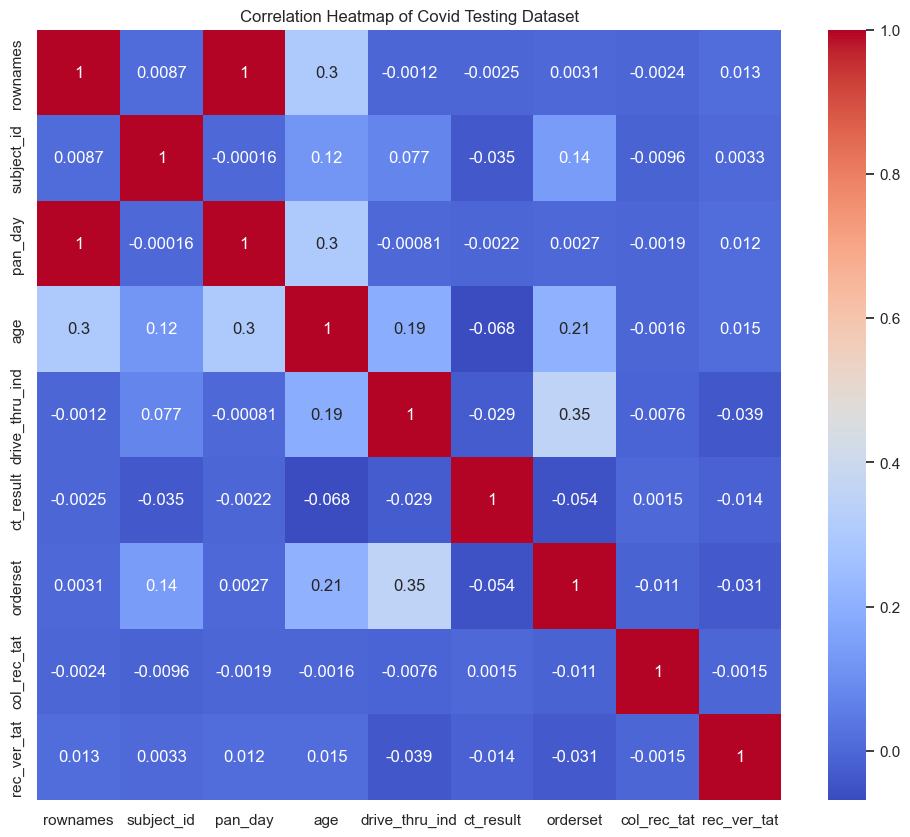

In [50]:
plt.figure(figsize=(12, 10))
# Create a heatmap of the correlation matrix
plt.title("Correlation Heatmap of Covid Testing Dataset")
sns.heatmap(covidt_df.corr(numeric_only=True), annot=True, cmap="coolwarm")

<Axes: title={'center': 'Correlation Heatmap of Cars Dataset'}>

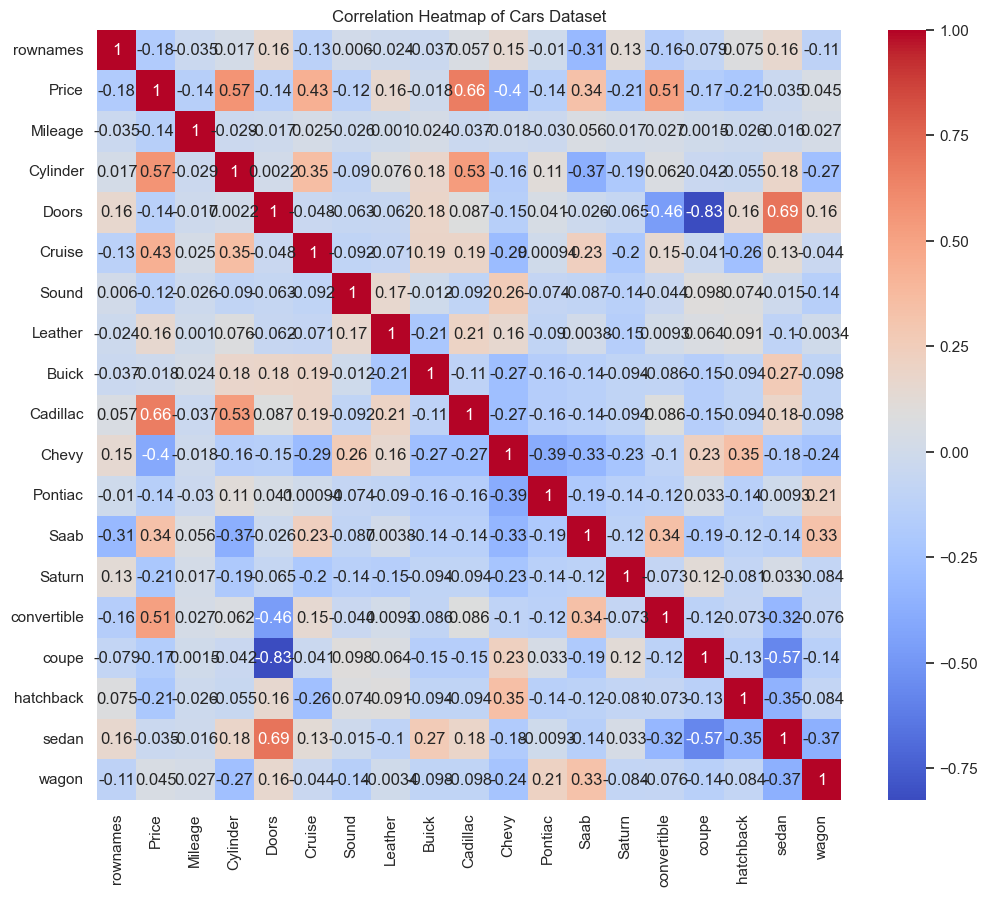

In [51]:
plt.figure(figsize=(12, 10))
# Create a heatmap of the correlation matrix
plt.title("Correlation Heatmap of Cars Dataset")
sns.heatmap(cars_df.corr(numeric_only=True), annot=True, cmap="coolwarm")

## Standard Error 
- Standard Deviation

In [53]:
print("First, we will calculate the std error of each column by running one command for all columns. We will obtain an output that displays the results with their respective column in each row.")


First, we will calculate the std error of each column by running one command for all columns. We will obtain an output that displays the results with their respective column in each row.


In [54]:
covidt_df[['pan_day', 'age', 'drive_thru_ind', 'ct_result', 'orderset', 'col_rec_tat', 'rec_ver_tat']].std()

pan_day            27.219249
age                16.472406
drive_thru_ind      0.499806
ct_result           3.981072
orderset            0.460345
col_rec_tat       492.816252
rec_ver_tat         5.092815
dtype: float64

In [55]:
print("Based on these results, it is evident that the column with the highest standard deviation is the col_rec_tat column at 492.81, which is the time elapsed between collect time and receive time. The column with the lowest standard deviation is the orderset column at 0.46. This column describes whether an order set was used for test order, with 1 meaning collected via orderset and 0 meaning not collected via orderset.")

Based on these results, it is evident that the column with the highest standard deviation is the col_rec_tat column at 492.81, which is the time elapsed between collect time and receive time. The column with the lowest standard deviation is the orderset column at 0.46. This column describes whether an order set was used for test order, with 1 meaning collected via orderset and 0 meaning not collected via orderset.


In [56]:
print("Next, we will obtain the standard error for each column")

Next, we will obtain the standard error for each column


## Standard Error

In [58]:
# Figure out data sample size, in order to calculate the standard error
len(covidt_df)

15524

In [59]:
# Calculate standard error using the .sem attribute in the pandas library 
print(f'The standard error of columns:\n{covidt_df.sem(numeric_only=True)}')

The standard error of columns:
rownames          35.968736
subject_id        29.003455
pan_day            0.218461
age                0.132207
drive_thru_ind     0.004011
ct_result          0.032169
orderset           0.003695
col_rec_tat        3.955334
rec_ver_tat        0.040875
dtype: float64


In [60]:
print("It is evident that the column with the highest standard error is the col_rec_tat column again, and the column with the lowest standard error is the orderset column again.")

It is evident that the column with the highest standard error is the col_rec_tat column again, and the column with the lowest standard error is the orderset column again.


## 5 - Step Hypothesis Testing

<B><U>One-Sample T-Test</U></B><BR></BR>We will conduct a one-sample t-test. That is, we will analyze the sample of one feature in our covid testing data frame and compare it to a hypothetical population mean of the same column. We will choose the values in the rec_ver_tat column for our sample data. We will create a variable for this data and another variable for the hypothetical population mean for rec_ver_tat. Then we will perform the one-sample t-test and analyze the results.

### Step 1: State the null and alternate hypothesis
<B>H0:</B> The sample for time elapsed between time and verification time is the same as the population time 5 minutes and 55 seconds.
<BR><B>Ha:</B> The sample for time elapsed between time and verification time is significantly different from the populaiton time 5 minutes and 55 seconds.

### Step 2: Compute the test statistic

In [215]:
from scipy.stats import ttest_1samp

# Sample data (rec_ver_tat or time elapsed between receive time and verification time)
sample_tat = covidt_df['rec_ver_tat']


# Population mean (hypothetical mean for rec_ver_tat)
population_tat = 5.55


# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(sample_tat, population_tat) 

print("We will use the ttest_1samp function from the scipy.stats library to calculate for the p-value and t-statistic of the sample set and population value.")

We will use the ttest_1samp function from the scipy.stats library to calculate for the p-value and t-statistic of the sample set and population value.


### Step 3: Determine the p-value

In [223]:
# Output the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: 2.1697571371981064
P-value: 0.030040367894612348


### Step 4: Make a decision

In [227]:
if p_value < 0.05: # we will reject the null hypothesis if p <= 0.05 alpha level.
    print("The average of the sample data is significantly different from the population data. Therefore, we will reject the null hypothesis.")
else: # if p > 0.05 alpha level we will fail to reject the null hypothesis.
    print("There is no significant difference in the average rec_ver_tat values. Therefore, we will fail to reject the null hypothesis.")

The average of the sample data is significantly different from the population data. Therefore, we will reject the null hypothesis.


### Step 5: State a real-world conclusion

In [230]:
print("Based on our t-test the P-value is lower than the significance score of 0.05. Therefore, we reject the null hypothesis. We can try another t-test with a different value for our population data to see if it is closer to the true population data. In order for our population data to be true we need our P-value to not be lower than the significance score of 0.05.")

Based on our t-test the P-value is lower than the significance score of 0.05. Therefore, we reject the null hypothesis. We can try another t-test with a different value for our population data to see if it is closer to the true population data. In order for our population data to be true we need our P-value to not be lower than the significance score of 0.05.


## Test for Normality
- Histogram (Visual)

## Histogram

In [68]:
print("We will proceed to observe graphic representations of the data in both dataframes. We will do this to test for the normality of the data.")

We will proceed to observe graphic representations of the data in both dataframes. We will do this to test for the normality of the data.


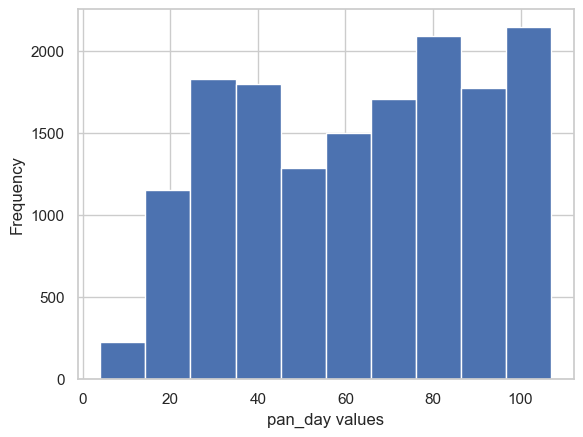

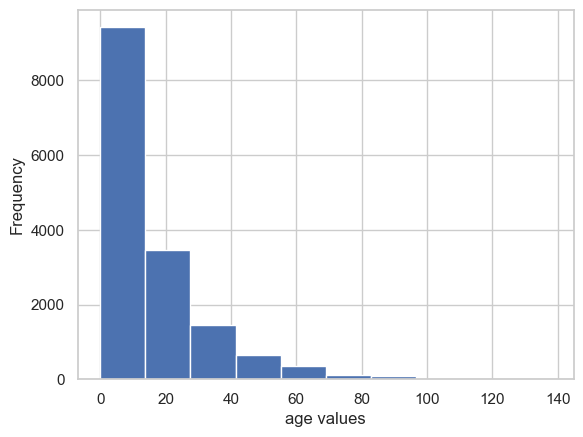

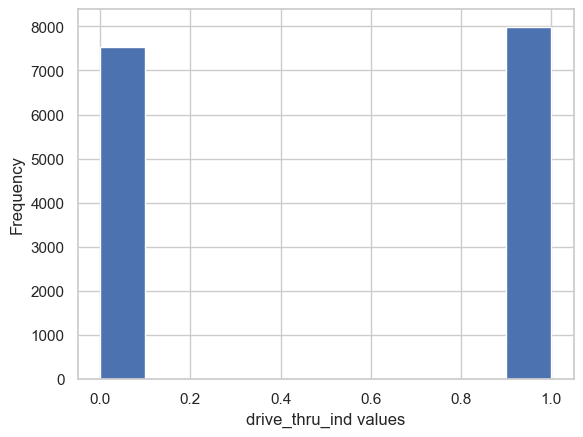

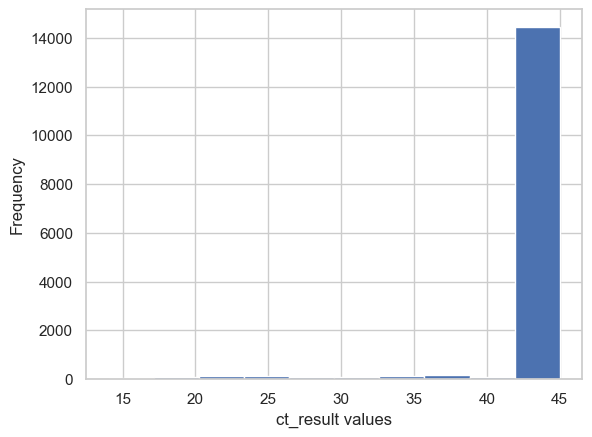

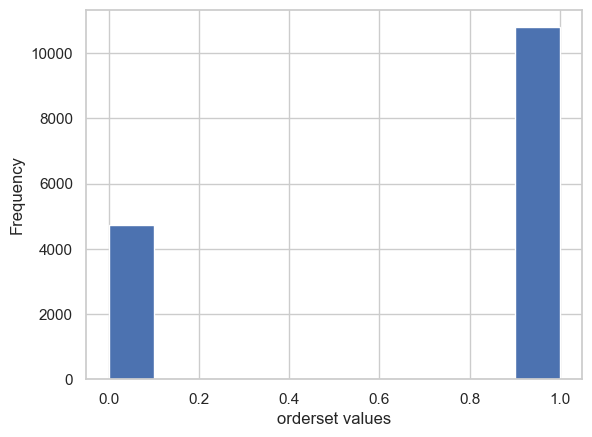

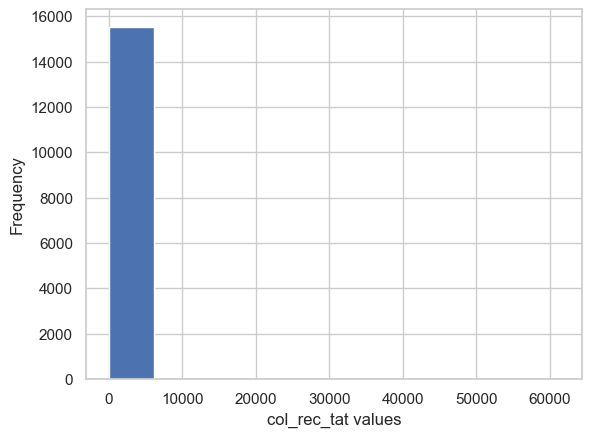

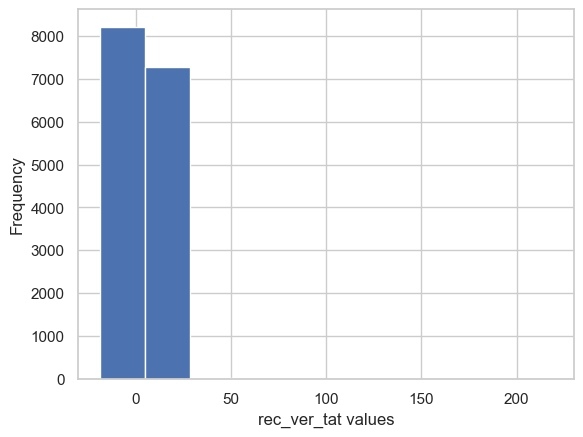

In [69]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

covidt_df['pan_day'].hist()
plt.xlabel('pan_day values')
plt.ylabel('Frequency')
plt.show()

covidt_df['age'].hist()
plt.xlabel('age values')
plt.ylabel('Frequency')
plt.show()

covidt_df['drive_thru_ind'].hist()
plt.xlabel('drive_thru_ind values')
plt.ylabel('Frequency')
plt.show()

covidt_df['ct_result'].hist()
plt.xlabel('ct_result values')
plt.ylabel('Frequency')
plt.show()

covidt_df['orderset'].hist()
plt.xlabel('orderset values')
plt.ylabel('Frequency')
plt.show()

covidt_df['col_rec_tat'].hist()
plt.xlabel('col_rec_tat values')
plt.ylabel('Frequency')
plt.show()

covidt_df['rec_ver_tat'].hist()
plt.xlabel('rec_ver_tat values')
plt.ylabel('Frequency')
plt.show()

We can see that most of the features contain binary data. The only features with non-binary data are pan_day and age. Therefore this dataset does not contain normality in the distribution of its data.

In [71]:
print(f'The standard error of columns:\n{cars_df.sem(numeric_only=True)}')

The standard error of columns:
rownames         8.190442
Price          348.611879
Mileage        289.061909
Cylinder         0.048934
Doors            0.029983
Cruise           0.015230
Sound            0.016474
Leather          0.015777
Buick            0.010563
Cadillac         0.010563
Chevy            0.017274
Pontiac          0.013747
Saab             0.012310
Saturn           0.009274
convertible      0.008522
coupe            0.013382
hatchback        0.009274
sedan            0.017217
wagon            0.009552
dtype: float64


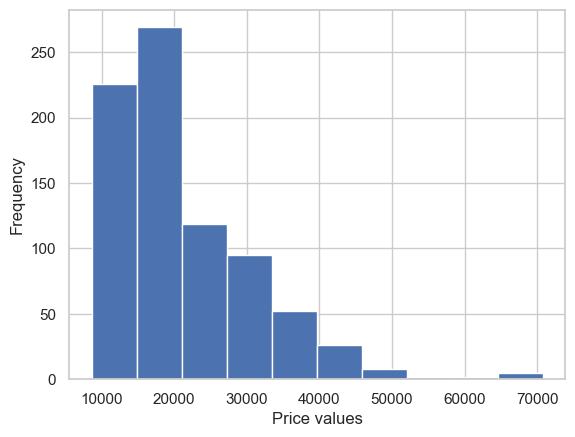

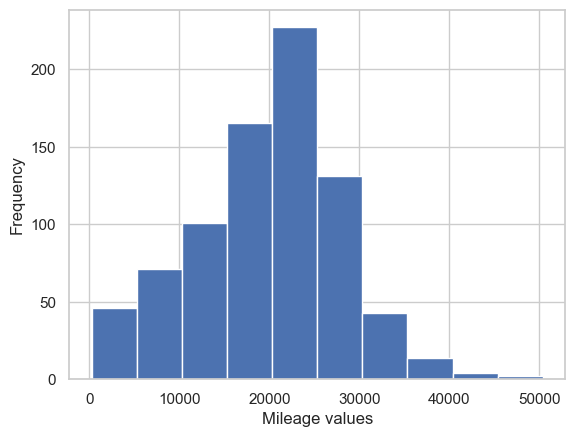

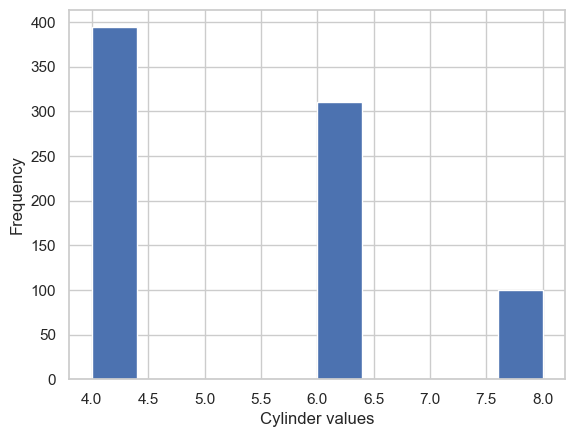

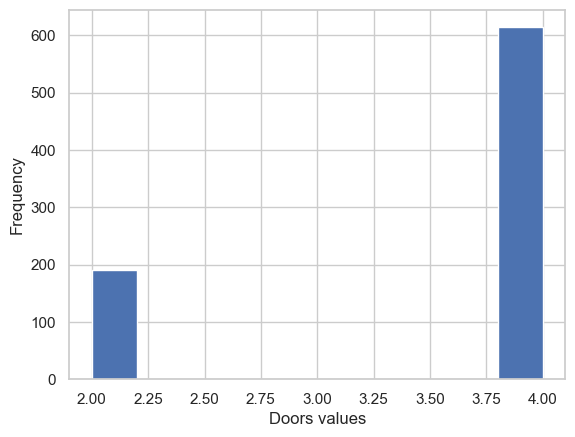

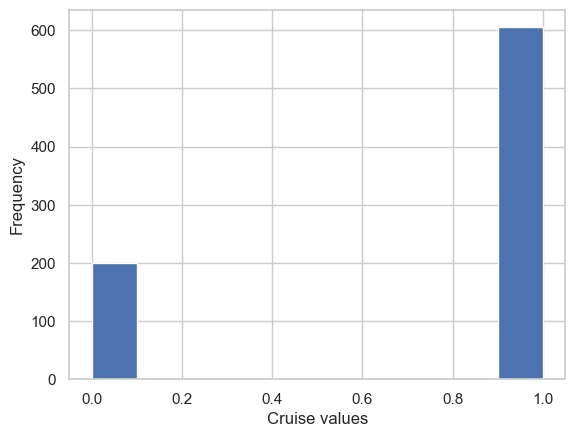

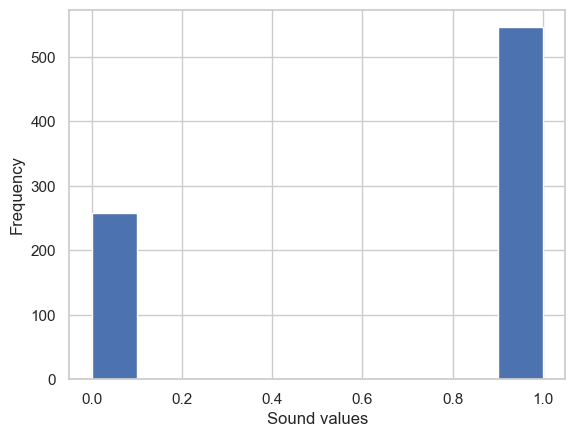

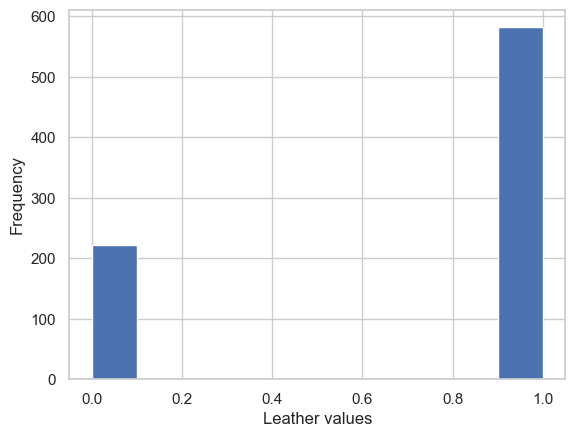

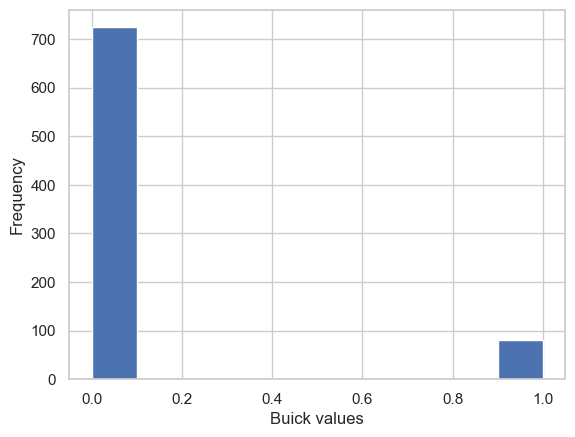

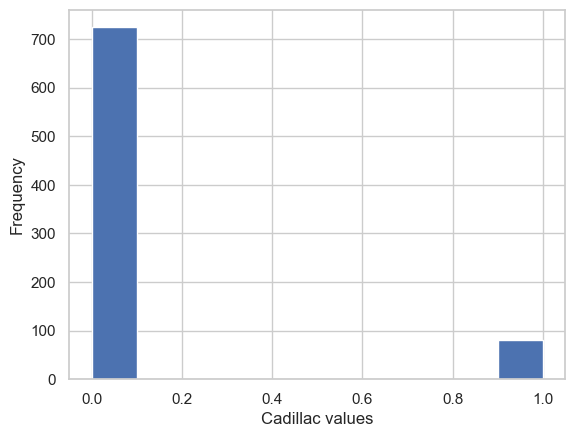

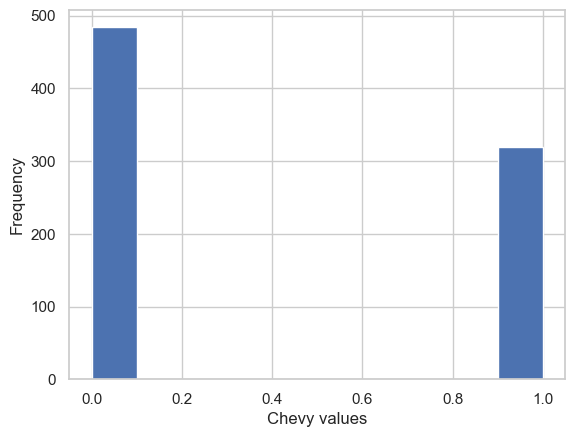

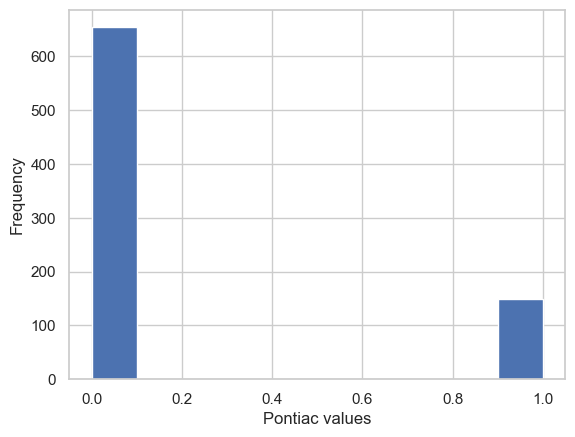

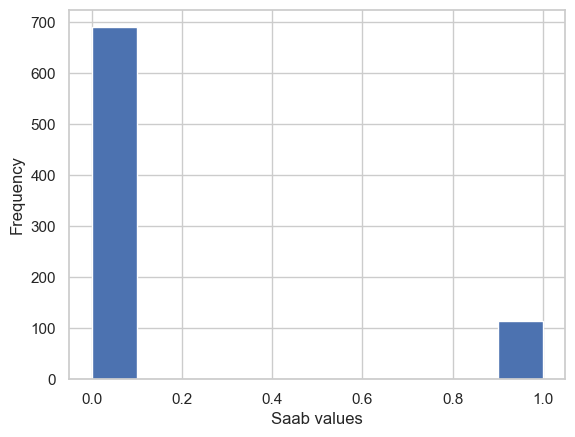

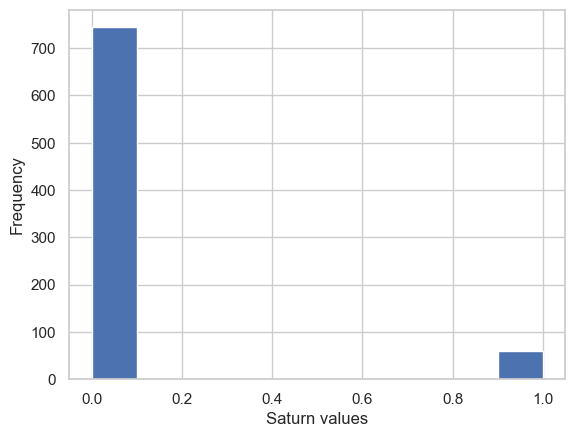

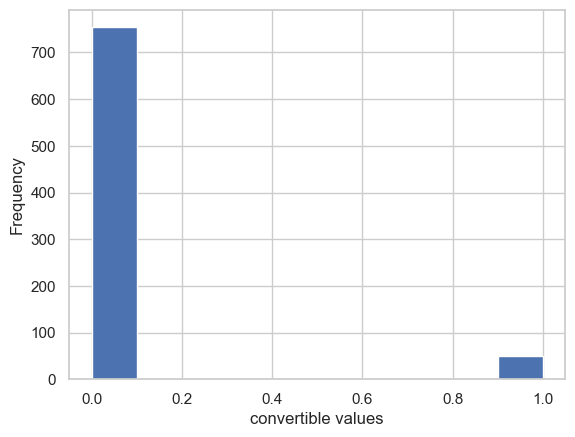

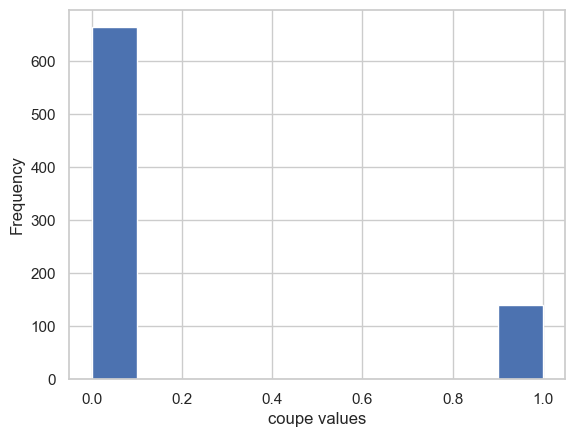

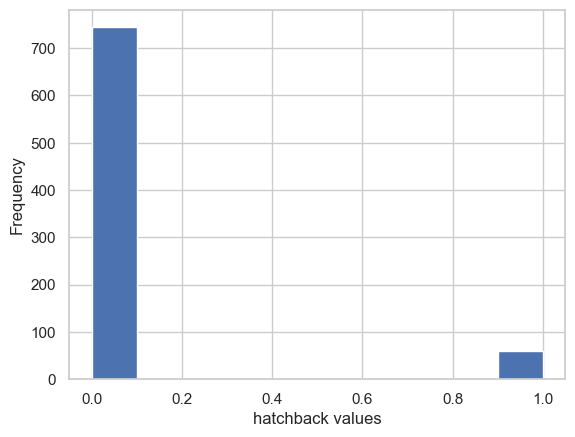

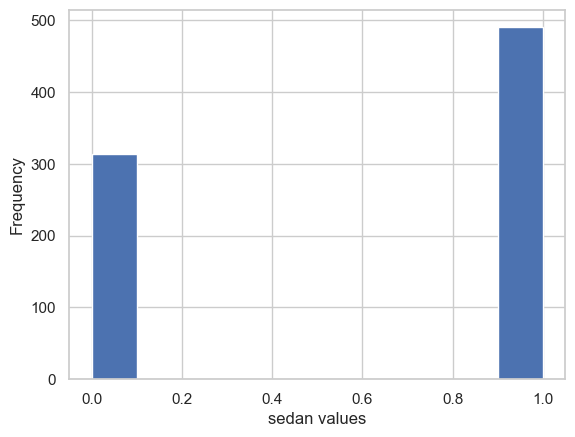

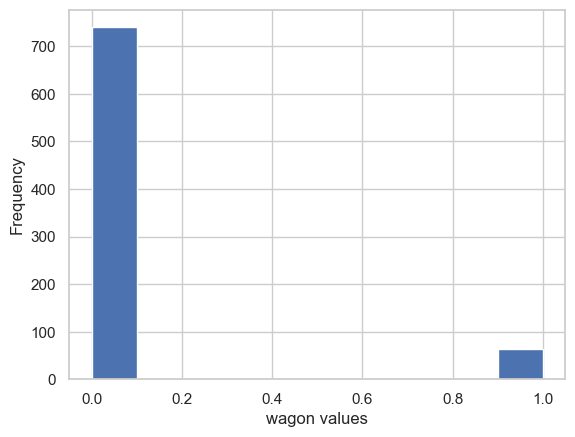

In [72]:
cars_df['Price'].hist()
plt.xlabel('Price values')
plt.ylabel('Frequency')
plt.show()

cars_df['Mileage'].hist()
plt.xlabel('Mileage values')
plt.ylabel('Frequency')
plt.show()

cars_df['Cylinder'].hist()
plt.xlabel('Cylinder values')
plt.ylabel('Frequency')
plt.show()

cars_df['Doors'].hist()
plt.xlabel('Doors values')
plt.ylabel('Frequency')
plt.show()

cars_df['Cruise'].hist()
plt.xlabel('Cruise values')
plt.ylabel('Frequency')
plt.show()

cars_df['Sound'].hist()
plt.xlabel('Sound values')
plt.ylabel('Frequency')
plt.show()

cars_df['Leather'].hist()
plt.xlabel('Leather values')
plt.ylabel('Frequency')
plt.show()

cars_df['Buick'].hist()
plt.xlabel('Buick values')
plt.ylabel('Frequency')
plt.show()

cars_df['Cadillac'].hist()
plt.xlabel('Cadillac values')
plt.ylabel('Frequency')
plt.show()

cars_df['Chevy'].hist()
plt.xlabel('Chevy values')
plt.ylabel('Frequency')
plt.show()

cars_df['Pontiac'].hist()
plt.xlabel('Pontiac values')
plt.ylabel('Frequency')
plt.show()

cars_df['Saab'].hist()
plt.xlabel('Saab values')
plt.ylabel('Frequency')
plt.show()

cars_df['Saturn'].hist()
plt.xlabel('Saturn values')
plt.ylabel('Frequency')
plt.show()

cars_df['convertible'].hist()
plt.xlabel('convertible values')
plt.ylabel('Frequency')
plt.show()

cars_df['coupe'].hist()
plt.xlabel('coupe values')
plt.ylabel('Frequency')
plt.show()

cars_df['hatchback'].hist()
plt.xlabel('hatchback values')
plt.ylabel('Frequency')
plt.show()

cars_df['sedan'].hist()
plt.xlabel('sedan values')
plt.ylabel('Frequency')
plt.show()

cars_df['wagon'].hist()
plt.xlabel('wagon values')
plt.ylabel('Frequency')
plt.show()

In [73]:
print("We can clearly see that the only histogram that displays a bell-shaped curve is the one created using the Mileage feature in cars_df. The Price feature demonstrates a one-sided graph display. All others demonstrate binary values only. This dataset is therefore not normally distributed with the exception of the Mileage feature.")

We can clearly see that the only histogram that displays a bell-shaped curve is the one created using the Mileage feature in cars_df. The Price feature demonstrates a one-sided graph display. All others demonstrate binary values only. This dataset is therefore not normally distributed with the exception of the Mileage feature.


## Regression
- Linear Regression
- Logistic Regression
- Performance Evaluation

## Linear Regression

Cars Model summary                             OLS Regression Results                            
Dep. Variable:                Mileage   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           4.68e-05
Time:                        17:52:30   Log-Likelihood:                -8377.2
No. Observations:                 804   AIC:                         1.676e+04
Df Residuals:                     802   BIC:                         1.677e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.236e+04    681.524 

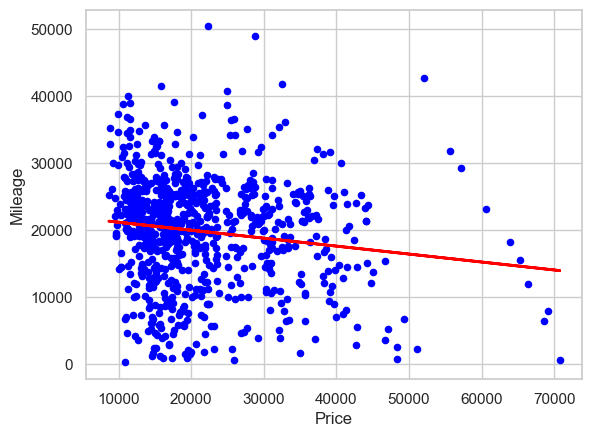

Predicted Mileage for the Price value of $80,000.00 is: 12874.375600594438


In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

Price = cars_df['Price']

# Fit regression model  
cars_model = smf.ols('Mileage ~ Price', data = cars_df).fit()

# Inspect the results
print("Cars Model summary", cars_model.summary())

# Plot the results of the linear regression model
cars_df.plot.scatter(x='Price', y='Mileage', c='blue')
plt.plot(cars_df['Price'], cars_model.predict(cars_df), color='red', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.show()

# Predict the Mileage for a given Price, i.e.
#    Price for car with Mileage as the determining factor for Price
print("Predicted Mileage for the Price value of $80,000.00 is:", cars_model.predict({"Price": 80000})[0])

In [77]:
# Comments

## Classification
### Logistic regression method

In [79]:
#logistic regression to predict postive or negative
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [80]:
## Check if any values in the dataset are null,missing
covidt_df.isnull().sum()
# Leave out ct_result

rownames              0
subject_id            0
fake_first_name      63
fake_last_name        0
gender                0
pan_day               0
test_id               0
clinic_name           0
result                0
demo_group            0
age                   0
drive_thru_ind        0
ct_result           209
orderset              0
payor_group        7087
patient_class      7077
col_rec_tat           0
rec_ver_tat           0
dtype: int64

In [81]:
print("Encode values in result from string type to binary values of 0 and 1. With corresponding values 'female' and 'male' ones.\n\n'female' -> 0 'male' -> 1")

Encode values in result from string type to binary values of 0 and 1. With corresponding values 'female' and 'male' ones.

'female' -> 0 'male' -> 1


In [82]:
from sklearn import preprocessing 
# More here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

le = preprocessing.LabelEncoder()

catToInt = pd.DataFrame(le.fit_transform(covidt_df.gender), columns=['gender']) # encode categorical variables as integers
print(catToInt)

       gender
0           0
1           0
2           1
3           0
4           1
...       ...
15519       0
15520       0
15521       0
15522       1
15523       0

[15524 rows x 1 columns]


### Confirm the encoding worked
Count the 0s and 1s

In [84]:
covidTestResults = covidt_df.groupby('gender')
covidTestResults['gender'].count()

gender
female    7832
male      7692
Name: gender, dtype: int64

### Replace the original column with the encoded one

In [86]:
# Dropping the original column
covidt_df.drop('gender', inplace = True, axis='columns')

#Adding the new encoded column
covidt_df = pd.concat([covidt_df, catToInt], axis=1)

covidt_df # View the dataframe with the new encoded column

rownames  subject_id fake_first_name fake_last_name  pan_day test_id  \
0             1        1412         jhezane     westerling        4   covid   
1             2         533           penny      targaryen        7   covid   
2             3        9134           grunt         rivers        7   covid   
3             4        8518      melisandre          swyft        8   covid   
4             5        8967          rolley       karstark        8   covid   
...         ...         ...             ...            ...      ...     ...   
15519     15520       11798           leona          royce      107   covid   
15520     15521       11986           gilly          tarly      107   covid   
15521     15522       12174         barbrey       manderly      107   covid   
15522     15523       12191          walder          tully      107   covid   
15523     15524       12328           jeyne      baratheon      107   covid   

             clinic_name    result   demo_group   age  drive_thru_ind  \
0       inpatient ward a  negative      patient   0.0               0   
1           clinical lab  negative      patient   0.0               1   
2           clinical lab  negative      patient   0.8               1   
3           clinical lab  negative      patient   0.8               1   
4         emergency dept  negative      patient   0.8               0   
...                  ...       ...          ...   ...             ...   
15519       clinical lab  negative      patient  17.0               1   
15520       clinical lab  negative      patient  18.0               1   
15521       clinical lab  negative  other adult  69.0               1   
15522  intl patient svcs  negative  other adult  69.0               0   
15523             ob gyn  negative  other adult  72.0               0   

       ct_result  orderset payor_group   patient_class  col_rec_tat  \
0           45.0         0  government       inpatient          1.4   
1           45.0         0  commercial  not applicable          2.3   
2           45.0         1         NaN             NaN          7.3   
3           45.0         1         NaN             NaN          5.8   
4           45.0         1  government       emergency          1.2   
...          ...       ...         ...             ...          ...   
15519       45.0         1         NaN             NaN          3.9   
15520       45.0         1         NaN             NaN          8.0   
15521       45.0         1         NaN             NaN          3.8   
15522       45.0         0  commercial  not applicable          0.8   
15523       45.0         0  commercial  not applicable          0.3   

       rec_ver_tat  gender  
0              5.2       0  
1              5.8       0  
2              4.7       1  
3              5.0       0  
4              6.4       1  
...            ...     ...  
15519          6.8       0  
15520          5.6       0  
15521          4.0       0  
15522          5.2       1  
15523          6.0       0  

[15524 rows x 18 columns]

### We will select a subset of features to include in the Logistic Regression model

In [235]:
feature_cols = ['pan_day','age','drive_thru_ind','orderset','col_rec_tat','rec_ver_tat'] ## Selecting which features we want to use for our modeling
X = covidt_df[feature_cols] # Features
y = covidt_df.gender # Target variable

### Split the dataset (X and y) into training and testing sets
Confirm that the split was conducted correctly

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Train size=', X_train.shape[0], 'Test size=', X_test.shape[0]) 

Train size= 11643 Test size= 3881


## Fit the Logistic Regression model

In [99]:
# instantiate the model (using the default parameters)
#logreg = LogisticRegression(random_state=0, solver='liblinear')
logreg = LogisticRegression(max_iter=100000)

# fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

## Make predicitons with the model and evaluate performance

In [102]:
y_pred = logreg.predict(X_test)

# performance evaluation: confusion matric
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cnf_matrix)

Confusion matrix:
 [[1243  731]
 [1198  709]]


### Plot the confusion matrix

Text(0.5, 427.9555555555555, 'Predicted label')

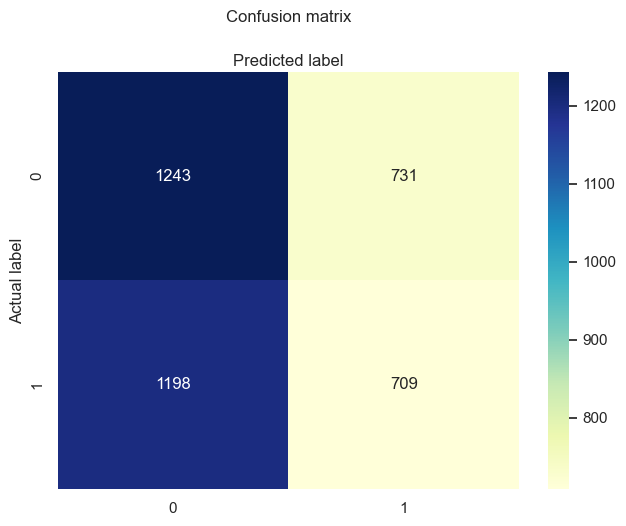

In [105]:
#Visualizing Confusion Matrix using Heatmap
%matplotlib inline

class_names=['female','male'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Evaluate performace using principal performance metrics

In [108]:
# model accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.3f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.3f}")
print(f"F1: {metrics.f1_score(y_test, y_pred):.3f}")

Accuracy: 0.503
Precision: 0.492
Recall: 0.372
F1: 0.424


### Print actual prediction and decode them from the binary to the original classes

In [111]:
print("Predicted binary labels:\n", y_pred)
print("Decoded:\n", le.inverse_transform(y_pred)) ## decofing the values for us to understand. 

Predicted binary labels:
 [1 0 1 ... 0 0 1]
Decoded:
 ['male' 'female' 'male' ... 'female' 'female' 'male']


## Classification (Decision Tree Classifier)

In [114]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [116]:
import sklearn
from graphviz import Digraph
from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO
from io import StringIO
from IPython.display import Image  
import pydotplus

Sklearn version 1.4.2


In [155]:
print("We will create a classification decision tree model with Gini as a criterion. We will use the result feature as the target variable.")

We will create a classification decision tree model with Gini as a criterion. We will use the result feature as the target variable.


In [193]:
feature_cols = ['pan_day','age','drive_thru_ind','orderset','col_rec_tat','rec_ver_tat'] ## Selecting which features we want to use for our modeling
X = covidt_df[feature_cols] # Features
y = covidt_df.result # Target variable

In [195]:
# use train_test_split function to split X and y into X_train,X_test,y_train and y_test
# within train_test_split() function set train_size to 0.7, 70% original data assigned to training data and 30% assigned to test data
# stratify as y, splits data using a stratified random sampling approach
# random_state to 123, this gives the same results each time

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=1) # 70% training and 30% test

In [197]:
# Create Decision Tree classifer object with "gini" as criterion
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9260145394313057


In [199]:
print("We get a classification rate of 92.60%, which is considered a good accuracy score. We can improve this accuracy by tuning the parameters in the decision tree algorithm.")

We get a classification rate of 92.60%, which is considered a good accuracy score. We can improve this accuracy by tuning the parameters in the decision tree algorithm.


## Display the tree structure

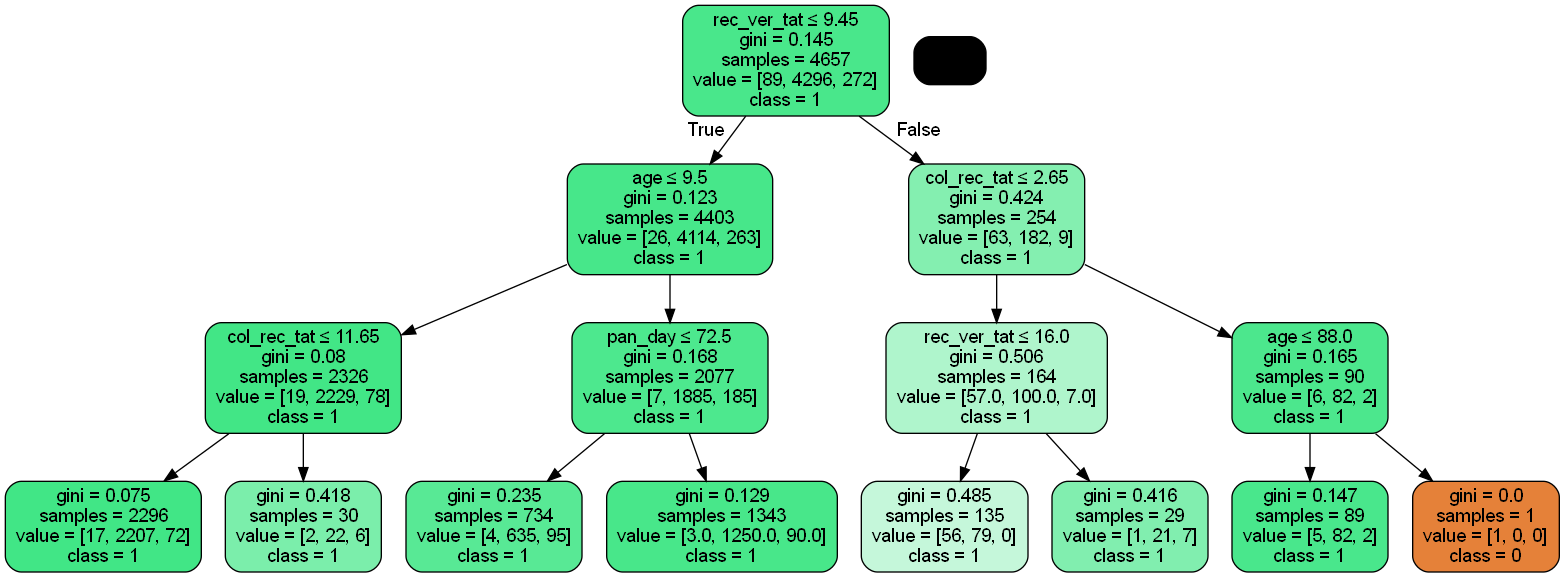

In [202]:
# Display the tree structure
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine_quality.png')
Image(graph.create_png())

## Interpreting the Results

## References:

Guttag, J. V. (2021a). Introduction to computation and programming using Python: With application to computational modeling and Understanding Data. MIT Press. 